Random forests para clasificación

In [1]:
import pandas as pd

train_data = pd.read_csv("/workspaces/Random_Forest/data/processed/diabetes_train.csv")
test_data = pd.read_csv("/workspaces/Random_Forest/data/processed/diabetes_test.csv")

train_data.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.304,21.0,0
1,9.0,112.0,28.2,1.282,50.0,1
2,1.0,139.0,28.7,0.654,22.0,0
3,0.0,161.0,21.9,0.254,65.0,0
4,6.0,134.0,46.2,0.238,46.0,1


In [2]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


[Text(0.5906664212076583, 0.96875, 'Glucose <= 144.5\ngini = 0.449\nsamples = 383\nvalue = [405, 209]\nclass = 0'),
 Text(0.2962076583210604, 0.90625, 'Glucose <= 99.5\ngini = 0.346\nsamples = 303\nvalue = [377, 108]\nclass = 0'),
 Text(0.44343703976435933, 0.9375, 'True  '),
 Text(0.11487481590574374, 0.84375, 'Pregnancies <= 11.5\ngini = 0.136\nsamples = 102\nvalue = [151, 12]\nclass = 0'),
 Text(0.07658321060382917, 0.78125, 'BMI <= 37.85\ngini = 0.118\nsamples = 100\nvalue = [149, 10]\nclass = 0'),
 Text(0.035346097201767304, 0.71875, 'DiabetesPedigreeFunction <= 0.248\ngini = 0.029\nsamples = 87\nvalue = [135, 2]\nclass = 0'),
 Text(0.023564064801178203, 0.65625, 'Age <= 25.5\ngini = 0.093\nsamples = 26\nvalue = [39, 2]\nclass = 0'),
 Text(0.011782032400589101, 0.59375, 'gini = 0.0\nsamples = 13\nvalue = [21, 0]\nclass = 0'),
 Text(0.035346097201767304, 0.59375, 'Age <= 26.5\ngini = 0.18\nsamples = 13\nvalue = [18, 2]\nclass = 0'),
 Text(0.023564064801178203, 0.53125, 'gini = 0.0\

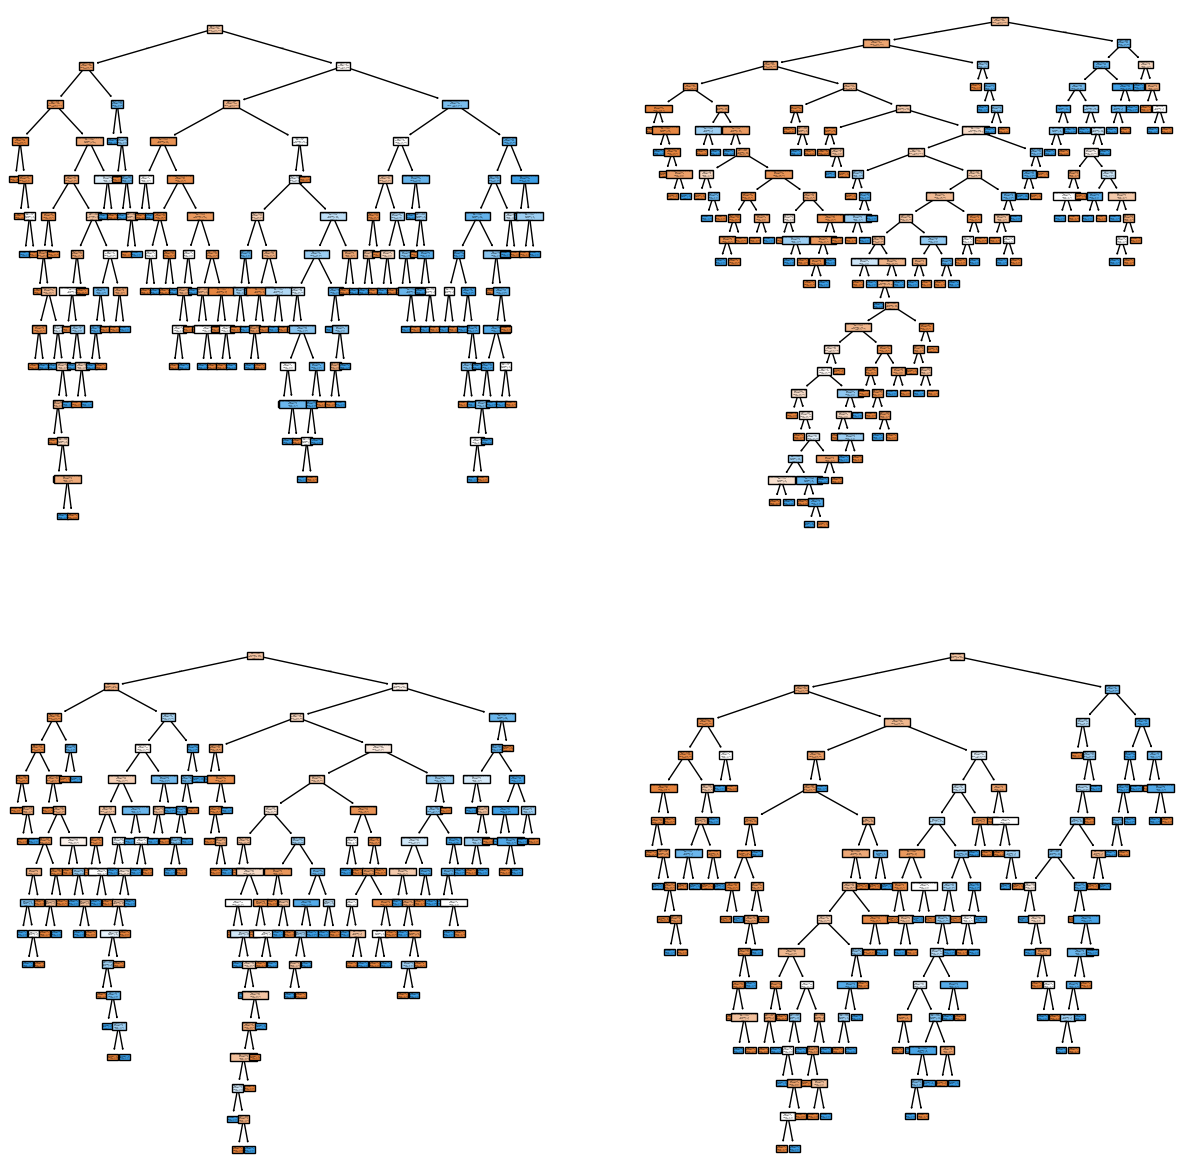

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

In [5]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7857142857142857

In [7]:
## Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        99
           1       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154



In [8]:
from pickle import dump

dump(model, open("random_forest_classifier_default_42.sav", "wb"))

In [9]:
Random forest para regresión

SyntaxError: invalid syntax (882596901.py, line 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0.43, 0.09, 0.03, 0.09, 0.62, 0.68, 0.  , 0.7 , 0.49, 0.79, 0.22,
       0.9 , 0.29, 0.66, 0.02, 0.41, 0.01, 0.03, 0.65, 0.66, 0.2 , 0.06,
       0.15, 0.05, 0.44, 1.  , 0.01, 0.01, 0.23, 0.1 , 0.52, 0.86, 0.86,
       0.98, 0.86, 0.61, 0.91, 0.59, 0.25, 0.59, 0.07, 0.29, 0.62, 0.39,
       0.  , 0.74, 0.54, 0.06, 0.01, 0.94, 0.  , 0.94, 0.67, 0.13, 0.1 ,
       0.11, 0.5 , 0.  , 0.23, 0.93, 0.67, 0.1 , 0.16, 0.54, 0.03, 0.79,
       0.  , 0.63, 0.02, 0.95, 0.67, 0.22, 0.02, 0.01, 0.07, 0.57, 0.05,
       0.02, 0.06, 0.13, 0.8 , 0.21, 0.2 , 0.55, 0.38, 0.98, 0.67, 0.55,
       0.43, 0.05, 0.02, 0.08, 0.  , 0.45, 0.38, 0.56, 0.55, 0.17, 0.96,
       0.04, 0.88, 0.06, 0.69, 0.77, 0.76, 0.11, 0.18, 0.97, 0.38, 0.81,
       0.01, 0.64, 0.22, 0.94, 0.51, 0.43, 0.67, 0.25, 0.  , 0.41, 0.  ,
       0.36, 0.45, 0.01, 0.14, 0.38, 0.45, 0.63, 0.77, 0.7 , 0.85, 0.56,
       0.02, 0.39, 0.98, 0.33, 0.25, 0.78, 0.81, 0.02, 0.04, 0.  , 0.35,
       0.74, 0.  , 0.15, 0.14, 0.02, 0.49, 0.54, 0.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.1640077922077922
Raíz del Error cuadrático medio: 0.40497875525488025
Coeficiente de determinación: 0.2856549494949493


In [ ]:
Optimización de hiperparámetros
RandomizedSearchCV

In [ ]:
# Importar libreria
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

## Optimización

rf_random = {"n_estimators": np.arange(200,600, 100),
           "max_depth": [None,5,10,15,20],
           "min_samples_split": np.arange(2,20, 2),
           "min_samples_leaf": np.arange(2, 20, 2),
           "max_features": [1,2,3,4,"sqrt","log2"]}

### RandomizedSearchCV

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_random,
                              scoring    = "neg_root_mean_squared_error",
                              n_iter= 20,
                              cv=5,
                              verbose=True)

## Entrenamiento
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [None, 5, ...], 'max_features': [1, 2, ...], 'min_samples_leaf': array([ 2, 4..., 14, 16, 18]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), ...}"
,n_iter,20
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
# Mejores parámetros

rs_model.best_params_

{'n_estimators': np.int64(200),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(14),
 'max_features': 3,
 'max_depth': 10}

In [ ]:
### Entrenamiento del mejor modelo


rs_model_best = RandomForestRegressor(**rs_model.best_params_)
rs_model_best.fit(X_train, y_train)

,n_estimators,np.int64(200)
,criterion,'squared_error'
,max_depth,10
,min_samples_split,np.int64(4)
,min_samples_leaf,np.int64(14)
,min_weight_fraction_leaf,0.0
,max_features,3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred_rs = rs_model_best.predict(X_test)

In [ ]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_rs)}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred_rs))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_rs)}")

Error cuadrático medio: 0.15914791273492676
Raíz del Error cuadrático medio: 0.3989334690583466
Coeficiente de determinación: 0.3068224245323188


GridSearchCV

In [ ]:
# Importar libreria

from sklearn.model_selection import GridSearchCV

## Optimización

rf_grid = {"n_estimators": np.arange(400,500, 100),
           "max_depth": [20,22],
           "min_samples_split": [16,18],
           "min_samples_leaf": [3,5],
           "max_features": [2,3,4]}

### RandomizedSearchCV

gd_model = GridSearchCV(RandomForestRegressor(),
                              param_grid=rf_grid,
                              scoring    = "neg_root_mean_squared_error",
                              n_jobs= -1,
                              cv=5,
                              verbose=True)

## Entrenamiento
gd_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [20, 22], 'max_features': [2, 3, ...], 'min_samples_leaf': [3, 5], 'min_samples_split': [16, 18], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(400)


In [ ]:
# Mejores parámetros

gd_model.best_params_

{'max_depth': 20,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 18,
 'n_estimators': np.int64(400)}

In [ ]:
### Entrenamiento del mejor modelo

gd_model_best = RandomForestRegressor(**gd_model.best_params_)
gd_model_best.fit(X_train, y_train)

,n_estimators,np.int64(400)
,criterion,'squared_error'
,max_depth,20
,min_samples_split,18
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred_gd = gd_model_best.predict(X_test)

In [ ]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_gd )}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred_gd ))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_gd )}")

Error cuadrático medio: 0.15620046970621543
Raíz del Error cuadrático medio: 0.3952220511386168
Coeficiente de determinación: 0.3196601763907059


In [ ]:
### Predicción en entrenamiento
y_train_pred = rs_model_best.predict(X_train)

In [ ]:
## Ajuste para entrenamiento

print(f"Error cuadrático medio: {mean_squared_error(y_train, y_train_pred )}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_train, y_train_pred ))}")
print(f"Coeficiente de determinación: {r2_score(y_train,y_train_pred )}")

Error cuadrático medio: 0.12274718812822631
Raíz del Error cuadrático medio: 0.3503529479371143
Coeficiente de determinación: 0.4582183164671795


In [ ]:
rs_model_best.feature_importances_

array([0.02904011, 0.48767141, 0.20190366, 0.08941656, 0.19196827])

In [ ]:
df = (pd.DataFrame({"Caracteristicas": X_train.columns,
                        "valores": rs_model_best.feature_importances_})
          .sort_values("valores", ascending=False))

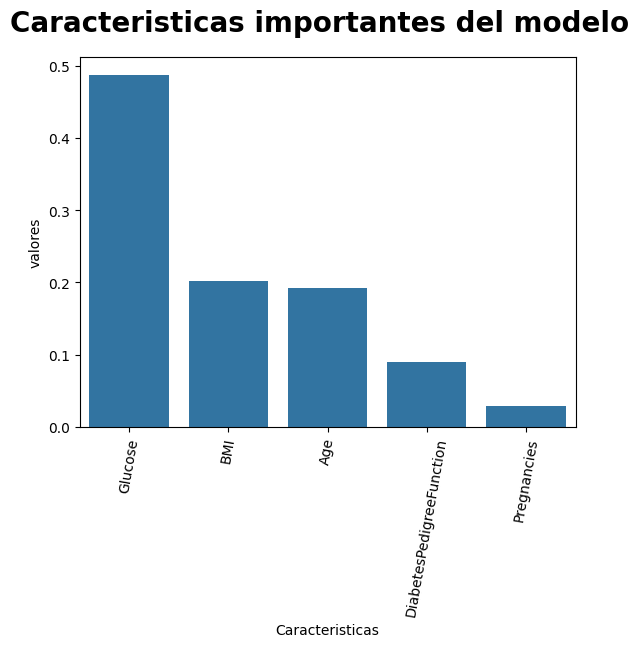

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Caracteristicas',y = 'valores',data = df, legend=False)
plt.suptitle('Caracteristicas importantes del modelo' , fontweight = 'black', fontsize=20)
plt.xticks(rotation=80);

In [ ]:
dump(model, open("random_forest_regressor_default_42.sav", "wb"))